<a href="https://colab.research.google.com/github/abdlkrim3/Machine_Learning/blob/main/polynomiale_regression_machine_learnia_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Régression Polynomiale Univariée ( 1 feature x1) - Gradient Descent

In [952]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# 1. Dataset

   Pour développer un modèle polynomial à partir des équations de la régression linéaire , il suffit d'ajouter des degrés de polynome dans les colonnes de la matrice X ainsi qu'un nombre égal de lignes dans le vecteur θ pour développer un modèle polynomiale: f(x)=ax²+bx+c. Ainsi, les matrices auront les formes suivantes : 




In [953]:
#!apt-get install -y git

In [954]:
#!git clone https://github.com/abdlkrim3/Machine_Learning.git


Chargement du dataset Iris pour effectuer les prédictions de la largeur des pétales en fonction de longueur des pétales

In [955]:
dataset=pd.read_csv("./Machine_Learning/iris.csv")

In [956]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<ipython-input-957-ff7724e0fe5e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),annot=True)


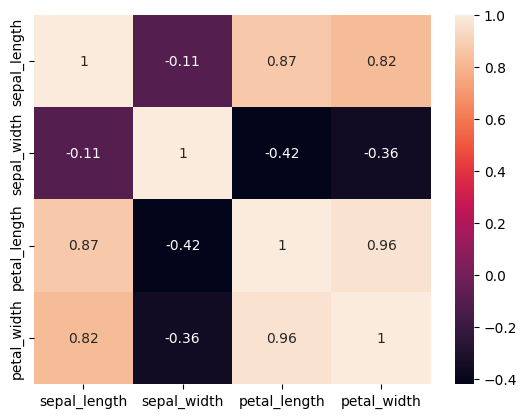

In [957]:
plt.figure()
sns.heatmap(dataset.corr(),annot=True)
plt.show()

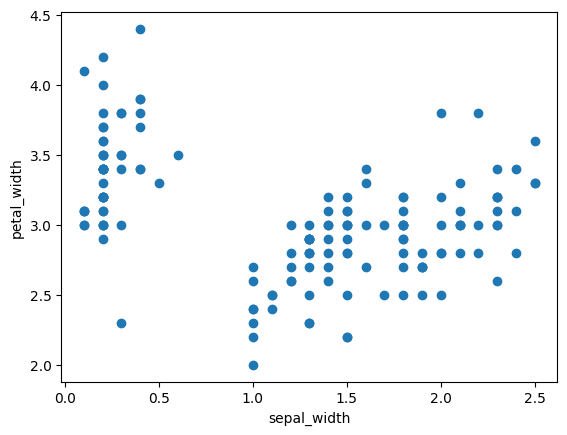

In [958]:
plt.plot(dataset["petal_width"],dataset["sepal_width"],'o')
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.show()

In [959]:
df=dataset[['petal_width','sepal_width']]
df

,petal_width,sepal_width
0,0.2,3.5
1,0.2,3.0
2,0.2,3.2
3,0.2,3.1
4,0.2,3.6
...,...,...
145,2.3,3.0
146,1.9,2.5
147,2.0,3.0
148,2.3,3.4


In [960]:
x=dataset.petal_width.values.reshape(150,1)
y=dataset.sepal_width.values.reshape(150,1)

In [961]:
# Verification des dimensions
print(x.shape)
print(y.shape)

(150, 1)
(150, 1)


In [962]:
# Création de la matrice X, inclut le Biais
X = np.hstack((x, np.ones(x.shape)))
X = np.hstack((x**3, X)) # ajoute le vecteur x^2 a la gauche de la matrice X

print(X.shape)
print(X[:10])

(150, 3)
[[0.008 0.2   1.   ]
 [0.008 0.2   1.   ]
 [0.008 0.2   1.   ]
 [0.008 0.2   1.   ]
 [0.008 0.2   1.   ]
 [0.064 0.4   1.   ]
 [0.027 0.3   1.   ]
 [0.008 0.2   1.   ]
 [0.008 0.2   1.   ]
 [0.001 0.1   1.   ]]


In [963]:
# Initialisation du vecteur theta aléatoire, avec 3 éléments (car X a trois colonnes)
theta = np.random.randn(3, 1)
theta

array([[-1.12788978],
       [ 1.28755238],
       [ 0.2465176 ]])

## 2. Modèle Linéaire
On implémente un modèle selon l'équation matricielle F=X.θ et puis on teste le modèle initiale défini par la valeur initiale de θ qu'on a initialisé d'une manière aléatoire.

In [964]:
def model(X, theta):
    return X.dot(theta)

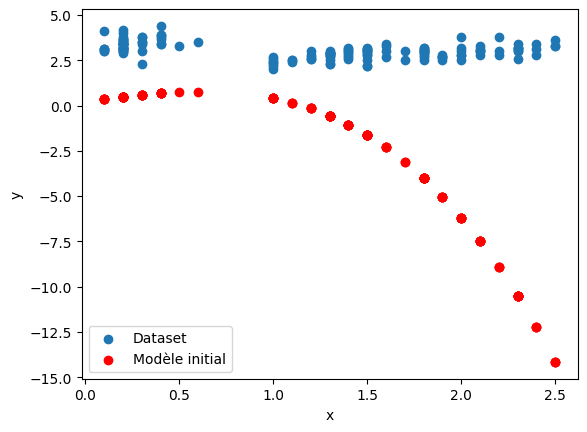

In [965]:
plt.scatter(x, y,label='Dataset')
plt.scatter(x, model(X, theta), c='r',label='Modèle initial')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## 3. Fonction coût : Erreur Quadratique Moyenne
On mesure les erreurs du modele sur le Dataset X, y en implémenterl'erreur quadratique moyenne, Mean Squared Error (MSE) en anglais.
Ensuite, on teste notre fonction, pour voir s'il n'y a pas de bug

In [966]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [967]:
cost_function(X, y, theta)

22.704007837772863

## 4. Gradients et Descente de Gradient
On implémente la formule du gradient pour la MSE. Ensuite on utilise cette fonction dans la descente de gradient

In [968]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [969]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

## 5. Phase d'entrainement
On définit un nombre d'itérations, ainsi qu'un pas d'apprentissage α. Une fois le modele entrainé, on observe les resultats par rapport a notre Dataset

In [970]:
n_iterations = 1000
learning_rate = 0.01

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [971]:
theta_final

array([[-0.10097836],
       [ 0.63904866],
       [ 2.59395098]])

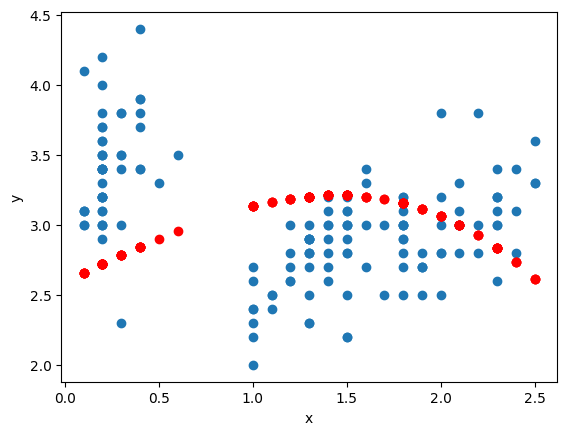

In [972]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)

# Affiche les résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.scatter(x, y)
plt.scatter(x, predictions, c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 6. Courbe d'apprentissage

   Pour vérifier si notre algorithme de Descente de gradient a bien fonctionné, on observe l'évolution de la fonction cout a travers les itérations. On est sensé obtenir une courbe qui diminue a chaque itération jusqu'a stagner a un niveau minimal (proche de zéro). Si la courbe ne suit pas ce motif, alors le pas learning_rate est peut-etre trop élevé, il faut prendre un pas plus faible.

plt.plot(range(n_iterations), cost_history)

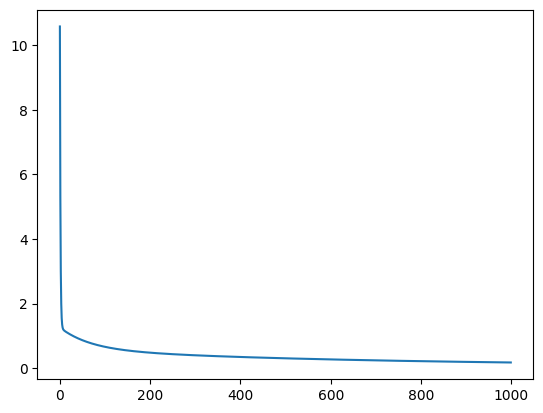

In [973]:
plt.plot(range(n_iterations), cost_history)
plt.show()

## 7. Evaluation du modèle - Coefficient de détermination

   Le coefficient de détermination est un indice de la qualité de la prédiction de la régression polynomiale. Le coefficient de détermination se sit!ue entre 0 et 1. Plus il est proche de 1, plus la régression polynomiale est en adéquation avec les données collectées.
   

In [974]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [975]:
coef_determination(y, predictions)

-0.8481528925927515